# Fall 2025 - Assignment 1

Electronic submission on ZoneCours no later than **October 17 at 11:55 PM** of:

* This Jupyter notebook (.ipynb) as the report, after adding your answers.
* All .py files necessary to run the notebook

The report must:

* be in .ipynb format (points will be deducted for any other format).
* include the student ID number of all team members in the first cell (i.e., replace these instructions).
* answer the questions and discuss the results using tables, figures, and Markdown cells.

Grading rubric:

* **40%** Accuracy of results
* **25%** Complete and concise discussions (Markdown cells)
* **20%** Conciseness of the notebook (.ipynb with minimal code) and clarity of figures
* **15%** Code clarity (.py)

# Context

We are going to consider the most liquid options traded on Apple on two particular business days of 2020: January 17 and March 20. The next couple of code cells were used to generate the dataset by connecting to OptionMetrics. With `GENERATE = False`, they simply load the dataset as saved to disk.

In [1]:
# The following import allow absolute imports scripts within the dorion_francois package
#import internal_script 

import datetime as dt
import os
import sys
import numpy as np
import pandas as pd
import pickle
import importlib

In [2]:
def filters(options):
    """These filters were applied to the data"""
    # Options before maturity
    options = options.loc[options.date < options.exdate].reset_index()

    # Positive open interest
    options = options[options['open_interest'] > 0] 

    # Abs(delta) between 0.01 and 0.99
    options = options[(options['delta'].abs() >= 0.01) & (options['delta'].abs() <= 0.99)] 

    # Implied vol between 0.03 and 2
    options = options[(options['impl_volatility'] >= 0.03) & (options['impl_volatility'] <= 2)] 

    # Bid price is greater than 0.1 and less than ask price
    options = options[(options['best_offer'] > options['best_bid']) & (options['best_bid'] > 0.1)] 
    
    return options

GENERATE = False
if GENERATE:
    import dorion_francois.option_metrics as om    
    jan17 = om.get_option_data(101594, dt.date(2020,1,17))
    mar20 = om.get_option_data(101594, dt.date(2020,3,20))
    options = filters( pd.concat((jan17,mar20),axis=0) )
    with open('202510-assignment1.pkl','wb') as fh:
        # OptionMetrics 'strike_price' column is the strike x1000. We'll drop it to avoid confusion; use the 'strike' column
        pickle.dump(options.drop(columns=['strike_price']),fh)
else:
    with open('202510-assignment1.pkl','rb') as fh:
        options = pickle.load(fh)
options.describe()

,index,secid,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,...,option_price,DTM,YTM,risk_free,stock_price,stock_exdiv,implied_forward_price,implied_vol_bms,implied_vol_bid,implied_vol_ask
count,3041.000000,3041.0,3041.0,3041.0,3041.0,3041.0,3041.000000,3041.0,3041.0,3041.0,...,3041.0,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3039.000000,2907.000000,3041.000000
mean,1290.575469,101594.0,39.54265,41.070812,302.719171,1493.480434,0.486984,0.051175,0.004216,43.996647,...,40.306731,247.602105,0.678362,0.011057,267.849300,266.408353,268.266957,0.491364,0.463369,0.517211
std,588.418749,0.0,47.505847,48.379765,1413.149222,2810.188475,0.246677,0.573104,0.00421,39.878651,...,47.939597,256.838994,0.703668,0.005106,44.329611,44.126488,45.364910,0.240483,0.227888,0.264064
min,166.000000,101594.0,0.11,0.14,0.0,1.0,0.209335,-0.989916,0.00004,0.264909,...,0.13,7.000000,0.019178,0.004597,229.240000,226.093746,227.456884,0.209760,0.004413,0.211192
25%,805.000000,101594.0,3.85,4.75,0.0,76.0,0.308580,-0.332122,0.001665,13.6014,...,4.25,35.000000,0.095890,0.006167,229.240000,227.603325,228.595023,0.313801,0.290405,0.324194
50%,1334.000000,101594.0,20.05,21.5,14.0,383.0,0.407585,0.02422,0.003027,29.80537,...,20.8,154.000000,0.421918,0.008564,229.240000,229.240000,229.774853,0.414581,0.389198,0.437239
75%,1800.000000,101594.0,60.75,63.0,97.0,1594.0,0.593389,0.526664,0.005168,64.20898,...,61.75,455.000000,1.246575,0.016588,318.730000,317.145554,319.221626,0.603811,0.573138,0.637671
max,2345.000000,101594.0,271.0,275.5,29443.0,28015.0,1.998797,0.989859,0.042843,193.543,...,273.25,882.000000,2.416438,0.017424,318.730000,318.730000,325.069560,1.656574,1.601841,2.527934


In [51]:
for col in options.columns:
    print(col)

index
secid
date
symbol
symbol_flag
exdate
last_date
cp_flag
best_bid
best_offer
volume
open_interest
impl_volatility
delta
gamma
vega
theta
optionid
cfadj
am_settlement
contract_size
ss_flag
forward_price
expiry_indicator
root
suffix
hash
strike
option_price
is_call
DTM
YTM
risk_free
stock_price
stock_exdiv
implied_forward_price
implied_vol_bms
implied_vol_bid
implied_vol_ask
M
moneyness
iv_crr
iv_diff_pct
euro_equiv
early_ex_premium


# Question 1

Create a scatter plot with the risk-free rate (`100*options.risk_free`) against the time to maturity expressed in years (`options.YTM`). Discuss the figure. Given that the Black-Merton-Scholes economy assumes that the risk-free rate is constant, should one still account for the variation it illustrates if pricing options with the model? Why?

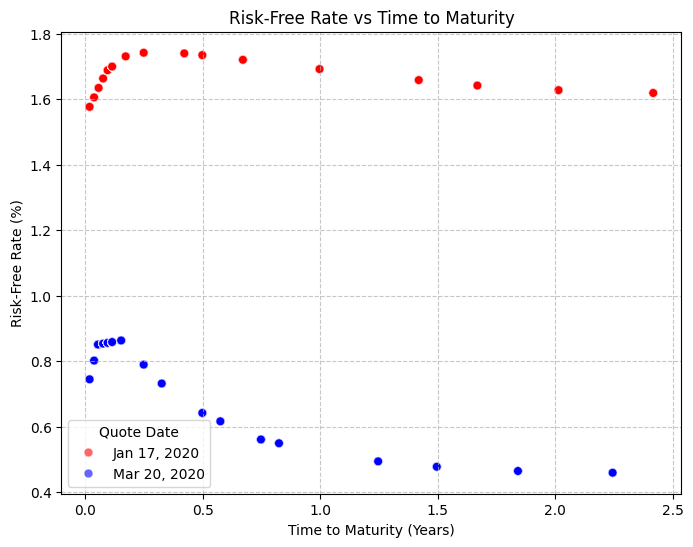

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a quote_date label
df = options.copy()
df['quote_date'] = df['date'].apply(
    lambda d: "Jan 17, 2020" if str(d).startswith("2020-01-17") else "Mar 20, 2020"
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="YTM",
    y=100 * df['risk_free'],
    hue="quote_date",                # color by date
    palette={"Jan 17, 2020": "red", "Mar 20, 2020": "blue"},
    alpha=0.6,
    s=40
)

plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Risk-Free Rate (%)")
plt.title("Risk-Free Rate vs Time to Maturity")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Quote Date")
plt.show()

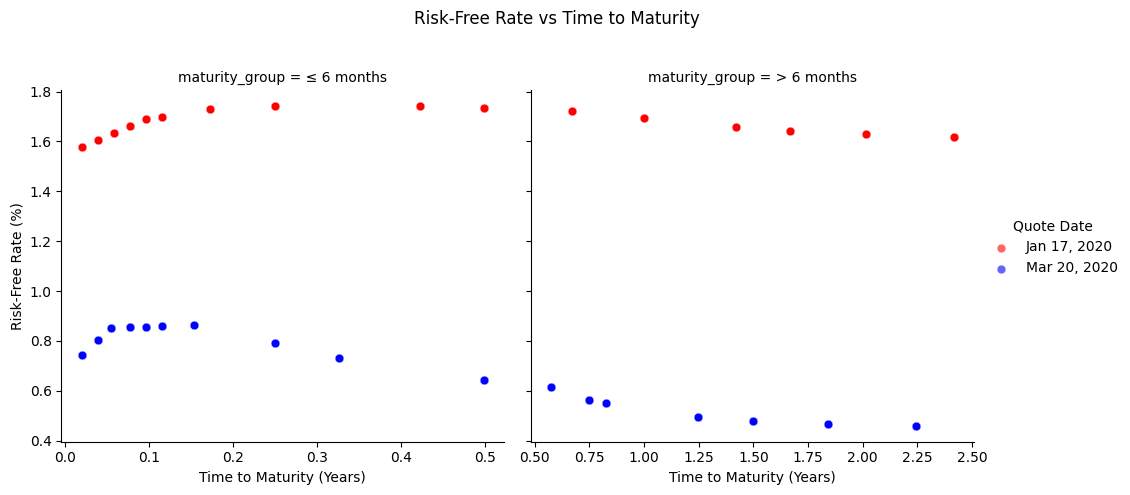

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = options[['YTM','risk_free','date']].dropna().copy()

df['date_norm']  = pd.to_datetime(df['date']).dt.tz_localize(None).dt.normalize()
labels = {pd.Timestamp('2020-01-17'): 'Jan 17, 2020',
          pd.Timestamp('2020-03-20'): 'Mar 20, 2020'}
df['quote_date'] = df['date_norm'].map(labels)

df = df[df['quote_date'].notna()].copy()

df['maturity_group'] = np.where(df['YTM'] <= 6/12, '≤ 6 months', '> 6 months')
df['risk_free_pct']  = 100 * df['risk_free']

palette = {'Jan 17, 2020': 'red', 'Mar 20, 2020': 'blue'}

g = sns.FacetGrid(df, col="maturity_group", height=5, sharex=False, sharey=True,
                  hue="quote_date", palette=palette)
g.map_dataframe(sns.scatterplot, x="YTM", y="risk_free_pct", alpha=0.6, s=40)
g.set_axis_labels("Time to Maturity (Years)", "Risk-Free Rate (%)")
g.add_legend(title="Quote Date")
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle("Risk-Free Rate vs Time to Maturity")
plt.show()



# Question 2
Similarly, scatter `options.stock - options.stock_exdiv`, where the former is the stock price and the latter accounts for the dividends **actually** paid over the life of the options.

Discuss the figure. Can we conclude that Apple changed its dividend policy between the two dates? Describe which variation of the Black-Merton-Scholes formula seen in class could be used to price the options on Apple if they were European options. Support your discussion with succinct mathematical expressions and/or derivations, in which you can focus on the calls without loss of generality.

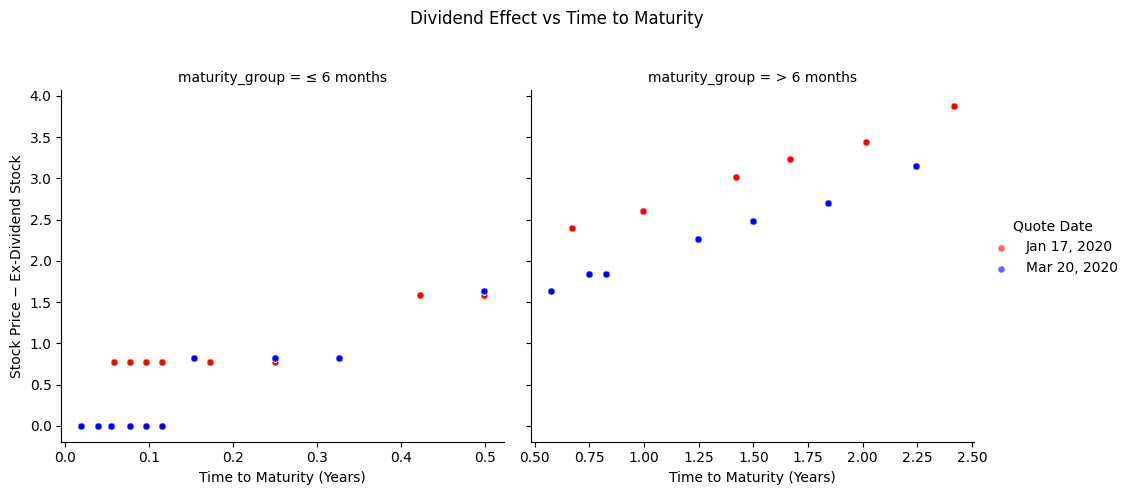

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = options[['YTM', 'stock_price', 'stock_exdiv', 'date']].dropna().copy()
df = df.assign(div_eff = df['stock_price'] - df['stock_exdiv'])

df['date_norm'] = pd.to_datetime(df['date']).dt.tz_localize(None).dt.normalize()

labels = {
    pd.Timestamp('2020-01-17'): 'Jan 17, 2020',
    pd.Timestamp('2020-03-20'): 'Mar 20, 2020'
}
df['quote_date'] = df['date_norm'].map(labels)


df = df[df['quote_date'].notna()]

df['maturity_group'] = np.where(df['YTM'] <= 6/12, '≤ 6 months', '> 6 months')

palette = {'Jan 17, 2020': 'red', 'Mar 20, 2020': 'blue'}
g = sns.FacetGrid(df, col='maturity_group', height=5, sharex=False, sharey=True,
                  hue='quote_date', palette=palette)
g.map_dataframe(sns.scatterplot, x='YTM', y='div_eff', alpha=0.6, s=25)

g.set_axis_labels('Time to Maturity (Years)', 'Stock Price − Ex-Dividend Stock')
g.add_legend(title='Quote Date')
g.fig.subplots_adjust(top=0.82)
g.fig.suptitle('Dividend Effect vs Time to Maturity')
plt.show()


# Question 3
Implement a function that inverts this variation of the BSM formula to obtain the BMS implied volatility for each of the options in the dataframe. Define moneyness as $M = K / \hat{S}_t$ and focus on out-of-the-money (OTM) options ($M \le 1$ puts, $M > 1$ calls). Create a dataframe `otm_options` containing only those options and add a column with the result of your IV calculation for each option therein.

In a 1x2 figure, scatter your results, with  on the x-axis, against a line plot for `implied_vol_bms`: In the left (right) panel, use options quoted on Jan 17 and expiring on Feb 14 (July 17), 2020, and options quoted on Mar 20 expiring on April 17 (Oct. 16), 2020. On each panel, you should thus have 2 lines with your results scattered atop them. Discuss this figure: how does the level and span (across moneyness) of the smiles vary, compare across maturities, etc. Given your discussion, can you suggest a better measure for moneyness? If you generate anew the previous figure using this alternate moneyness measure, how does it impact your analysis of the figure?

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

# --- Black–Scholes price (no dividends; we use stock_exdiv as S_hat) ---
def bs_price(S, K, r, tau, sigma, cp):
    if sigma <= 0 or tau <= 0:
        # fall back to intrinsic with tiny vol (prevents div/0 in d1)
        intrinsic = max(0.0, (S - K) if cp == "C" else (K - S))
        return intrinsic
    sqrt_tau = np.sqrt(tau)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * sqrt_tau)
    d2 = d1 - sigma * sqrt_tau
    if cp == "C":
        return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    else:  # "P"
        return K * np.exp(-r * tau) * norm.cdf(-d2) - S * norm.cdf(-d1)

# --- Implied volatility via root finding on price error ---
def implied_vol(price, S, K, r, tau, cp, vol_lo=1e-6, vol_hi=5.0):
    # No-arbitrage bounds (quick sanity filter)
    forward = S * np.exp(r * tau)
    intrinsic = max(0.0, (S - K) if cp == "C" else (K - S))
    upper_bound = S if cp == "C" else K * np.exp(-r * tau)
    if not (intrinsic <= price <= upper_bound + 1e-8):
        return np.nan  # observed price violates bounds

    # Root for f(sigma) = BS(sigma) - price
    def f(sig):
        return bs_price(S, K, r, tau, sig, cp) - price

    try:
        # Ensure the bracket straddles zero; expand if needed
        lo, hi = vol_lo, vol_hi
        flo, fhi = f(lo), f(hi)
        if flo * fhi > 0:
            # Try expanding the upper bracket a bit more
            for hi in (7.5, 10.0):
                if f(lo) * f(hi) <= 0:
                    break
            else:
                return np.nan
        return brentq(f, lo, hi, maxiter=200, xtol=1e-8)
    except Exception:
        return np.nan

# --- Build OTM subset and compute IVs ---
# Assumes these columns exist:
# 'cp_flag' in {'C','P'}, 'strike', 'stock_exdiv', 'option_price', 'YTM', 'risk_free'
options = options.copy()

# Moneyness M = K / S_hat  (S_hat = stock_exdiv)
options["M"] = options["strike"] / options["stock_exdiv"]

# OTM mask: puts M<=1, calls M>1
mask_otm = ((options["cp_flag"] == "P") & (options["M"] <= 1.0)) | \
           ((options["cp_flag"] == "C") & (options["M"] > 1.0))

otm_options = options.loc[mask_otm].copy()

# Compute IV per-row
def _row_iv(row):
    return implied_vol(
        price=row["option_price"],
        S=row["stock_exdiv"],
        K=row["strike"],
        r=row["risk_free"],
        tau=row["YTM"],
        cp=row["cp_flag"]
    )

otm_options["iv_bsm"] = otm_options.apply(_row_iv, axis=1)

# (optional) keep only relevant columns
# otm_options = otm_options[["secid","date","cp_flag","strike","stock_exdiv","option_price","YTM","risk_free","M","iv_bsm"]]

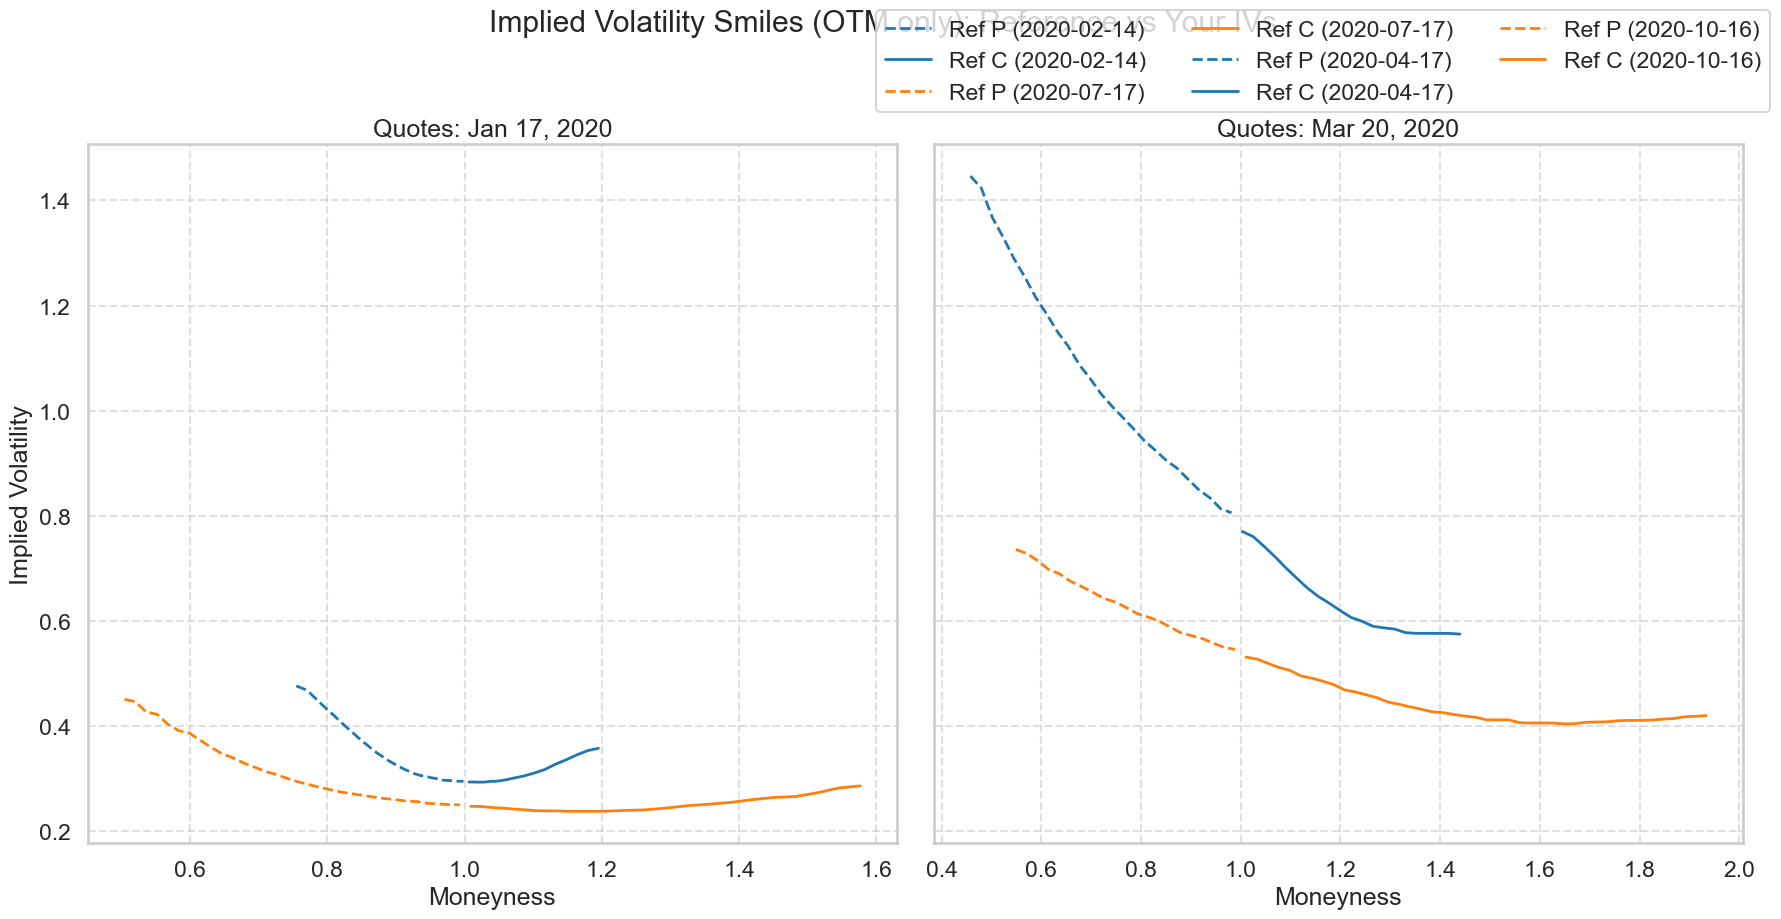

In [22]:


# ---- config ----
QUOTE_LEFT  = pd.Timestamp("2020-01-17")
EXPS_LEFT   = [pd.Timestamp("2020-02-14"), pd.Timestamp("2020-07-17")]
QUOTE_RIGHT = pd.Timestamp("2020-03-20")
EXPS_RIGHT  = [pd.Timestamp("2020-04-17"), pd.Timestamp("2020-10-16")]

# choose the reference IV col present in your data
iv_ref_col = next(c for c in ["implied_vol_bms","impl_volatility","impl_vol"] if c in options.columns)

# ---- prep base frames ----
opt = options.copy()
opt["date"]   = pd.to_datetime(opt["date"]).dt.tz_localize(None).dt.normalize()
opt["exdate"] = pd.to_datetime(opt["exdate"]).dt.tz_localize(None).dt.normalize()
opt["M"] = opt["strike"] / opt["stock_exdiv"]

# OTM mask (same rule for both datasets)
mask_otm = ((opt["cp_flag"]=="P") & (opt["M"]<=1.0)) | ((opt["cp_flag"]=="C") & (opt["M"]>1.0))

ref = opt.loc[mask_otm, ["date","exdate","cp_flag","M",iv_ref_col]].dropna().copy()
mine = otm_options.loc[:, ["date","exdate","cp_flag","M","iv_bsm"]].dropna().copy()

# (optional) small rolling median smoothing to reduce micro-zigzags
def smooth_by_M(df, ycol, win=3):
    d = df.sort_values("M").copy()
    if len(d) >= win:
        d[ycol] = d[ycol].rolling(win, center=True, min_periods=1).median()
    return d

# ---- plotting helper ----
def plot_panel(ax, qdate, expiries, title):
    colors = sns.color_palette(n_colors=len(expiries))
    ls_map = {"P":"--", "C":"-"}   # puts dashed, calls solid

    for i, exp in enumerate(expiries):
        for cp in ["P","C"]:
            r = ref[(ref["date"]==qdate) & (ref["exdate"]==exp) & (ref["cp_flag"]==cp)]
            m = mine[(mine["date"]==qdate) & (mine["exdate"]==exp) & (mine["cp_flag"]==cp)]

            if not r.empty:
                r = smooth_by_M(r, iv_ref_col, win=3)
                ax.plot(r["M"], r[iv_ref_col], ls_map[cp], color=colors[i],
                        lw=2, label=f"Ref {cp} ({exp.date()})")

            if not m.empty:
                m = m.sort_values("M")
                ax.scatter(m["M"], m["iv_bsm"], color=colors[i], s=28, alpha=0.65,
                           label=f"My {cp} ({exp.date()})")

    ax.set_title(title)
    ax.set_xlabel(r"Moneyness")
    ax.grid(True, linestyle="--", alpha=0.6)

# ---- draw 1x2 figure ----
sns.set_context("talk"); sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(18, 9), sharey=True)

plot_panel(axes[0], QUOTE_LEFT,  EXPS_LEFT,  "Quotes: Jan 17, 2020")
plot_panel(axes[1], QUOTE_RIGHT, EXPS_RIGHT, "Quotes: Mar 20, 2020")

axes[0].set_ylabel("Implied Volatility")

# optional: keep reasonable x-range if you want similar panels
# for ax in axes: ax.set_xlim(0.5, 1.6)

# consolidated legend
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h; labels += l
fig.legend(handles, labels, ncol=3, frameon=True)
fig.suptitle("Implied Volatility Smiles (OTM only): Reference vs Your IVs", y=1.03)
fig.tight_layout()
plt.show()


# Question 4

Consider the same OTM options as in the previous question. We now want to scatter
\begin{equation}
    100 \left(\frac{ \text{'impl\_volatility'} }{ \text{'implied\_vol\_bms'} } - 1\right)
\end{equation}
against moneyness (the version you feel most comfortable with). The 'impl_volatility' column provides an implied volatility measure as computed by the data provider using a proprietary algorithm. How should the y-axis be interpreted? Are the magnitudes relatively large or small? Would we obtain the same result comparing CRR and BMS implied volatilities for the in-the-money (ITM) options?

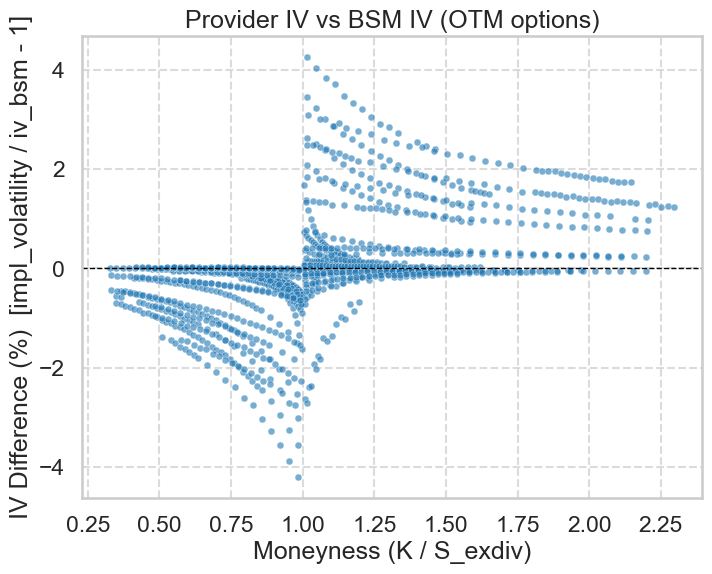

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- normalize dates so joins work ---
def _norm_dates(df):
    df = df.copy()
    for c in ["date", "exdate"]:
        df[c] = pd.to_datetime(df[c]).dt.tz_localize(None).dt.normalize()
    return df

opts = _norm_dates(options)
otm  = _norm_dates(otm_options)   # contains iv_bsm

# --- merge provider IV (impl_volatility) onto your OTM rows with iv_bsm ---
keys = ["date", "exdate", "cp_flag", "strike"]
df = (
    otm[keys + ["stock_exdiv", "iv_bsm"]]
    .merge(opts[keys + ["impl_volatility"]], on=keys, how="left")
    .dropna(subset=["iv_bsm", "impl_volatility", "stock_exdiv"])
)

# --- same moneyness as before: K / S_exdiv ---
df["moneyness"] = df["strike"] / df["stock_exdiv"]

# (re)ensure OTM filter matches your earlier rule
df = df[((df["cp_flag"] == "P") & (df["moneyness"] <= 1.0)) |
        ((df["cp_flag"] == "C") & (df["moneyness"] > 1.0))]

# --- compute % difference and plot ---
df["iv_diff_pct"] = 100 * (df["impl_volatility"] / df["iv_bsm"] - 1)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="moneyness", y="iv_diff_pct", alpha=0.6, s=25)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Moneyness (K / S_exdiv)")
plt.ylabel("IV Difference (%)  [impl_volatility / iv_bsm - 1]")
plt.title("Provider IV vs BSM IV (OTM options)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


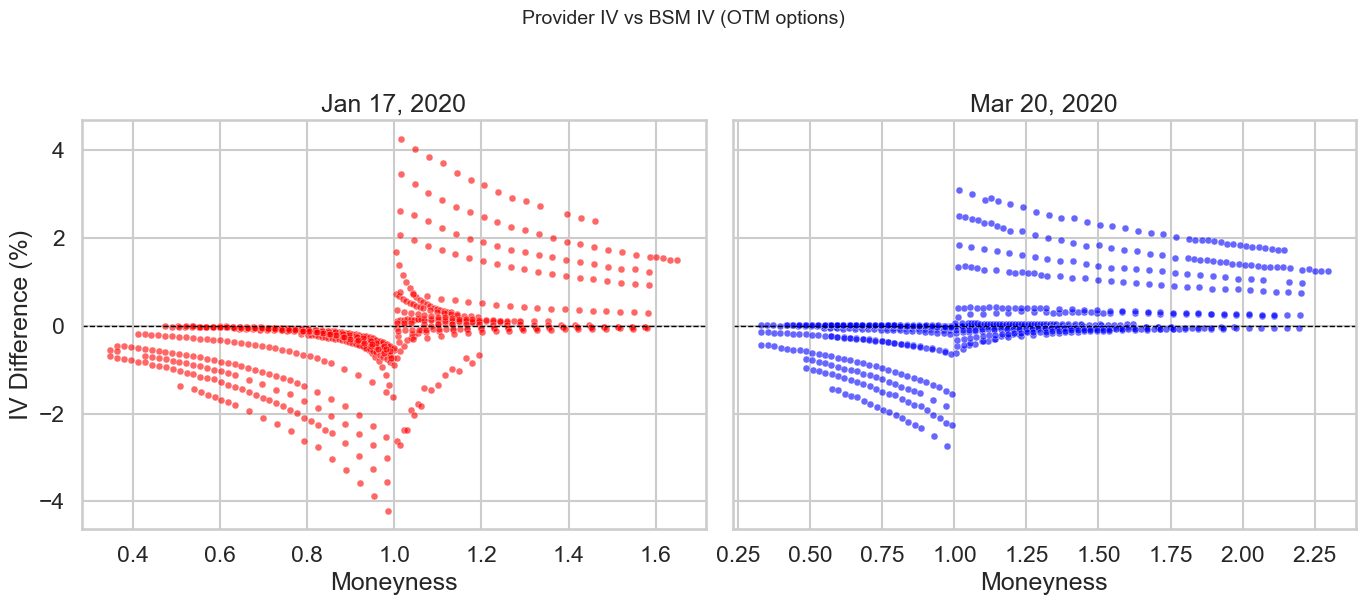

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare two subsets
df_jan17 = df[df['date'] == pd.Timestamp("2020-01-17")].copy()
df_mar20 = df[df['date'] == pd.Timestamp("2020-03-20")].copy()

# Set up figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# --- Jan 17, 2020 ---
sns.scatterplot(
    data=df_jan17,
    x="moneyness",
    y="iv_diff_pct",
    alpha=0.6,
    s=25,
    ax=axes[0],
    color="red"
)
axes[0].axhline(0, color="black", linestyle="--", linewidth=1)
axes[0].set_title("Jan 17, 2020")
axes[0].set_xlabel("Moneyness")
axes[0].set_ylabel("IV Difference (%)")

# --- Mar 20, 2020 ---
sns.scatterplot(
    data=df_mar20,
    x="moneyness",
    y="iv_diff_pct",
    alpha=0.6,
    s=25,
    ax=axes[1],
    color="blue"
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Mar 20, 2020")
axes[1].set_xlabel("Moneyness")
axes[1].set_ylabel("")

# Overall title
fig.suptitle("Provider IV vs BSM IV (OTM options)", fontsize=14, y=1.02)

plt.tight_layout()
plt.show()


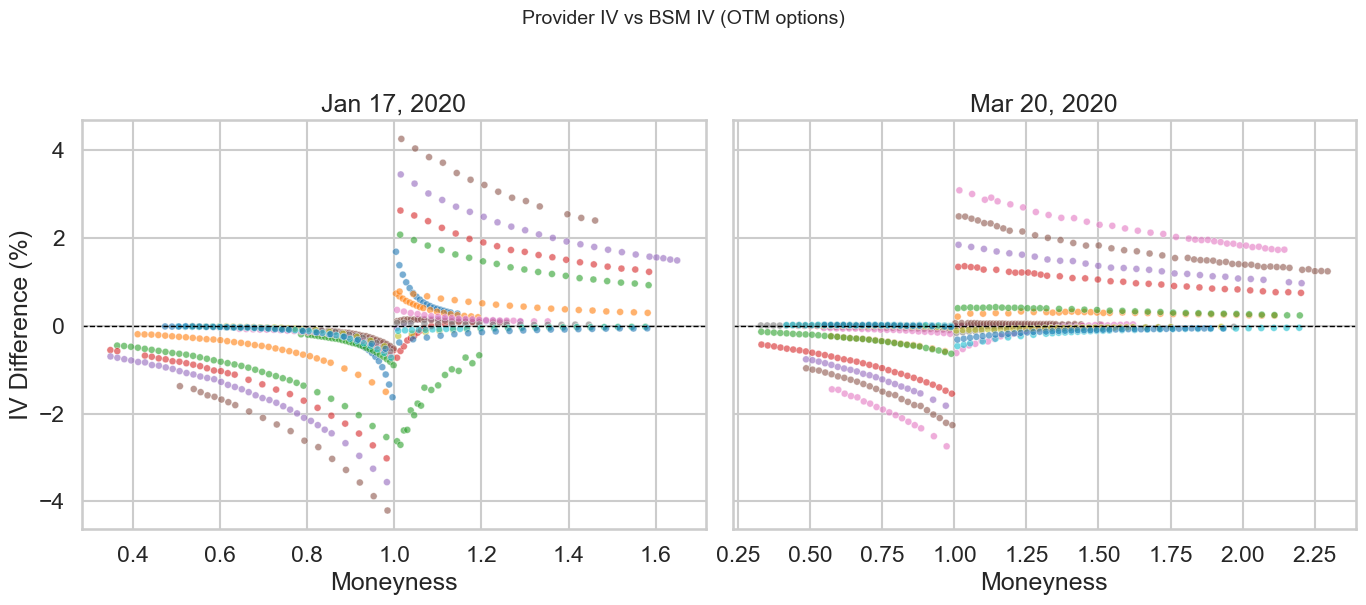

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Subsets for each quote date
df_jan17 = df[df['date'] == pd.Timestamp("2020-01-17")].copy()
df_mar20 = df[df['date'] == pd.Timestamp("2020-03-20")].copy()

df = df[((df["cp_flag"] == "P") & (df["moneyness"] <= 1.0)) |
        ((df["cp_flag"] == "C") & (df["moneyness"] > 1.0))]



fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# --- Jan 17, 2020 ---
sns.scatterplot(
    data=df_jan17,
    x="moneyness",
    y="iv_diff_pct",
    hue="exdate",         # color by expiration
    palette="tab10",      # Seaborn built-in palette
    alpha=0.6,
    s=25,
    ax=axes[0]
)
axes[0].axhline(0, color="black", linestyle="--", linewidth=1)
axes[0].set_title("Jan 17, 2020")
axes[0].set_xlabel("Moneyness")
axes[0].set_ylabel("IV Difference (%)")


# --- Mar 20, 2020 ---
sns.scatterplot(
    data=df_mar20,
    x="moneyness",
    y="iv_diff_pct",
    hue="exdate",
    palette="tab10",
    alpha=0.6,
    s=25,
    ax=axes[1]
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Mar 20, 2020")
axes[1].set_xlabel("Moneyness")
axes[1].set_ylabel("")

axes[0].legend_.remove()
axes[1].legend_.remove()

# One shared legend
#handles, labels = axes[1].get_legend_handles_labels()
#fig.legend(handles, labels, title="Expiration", loc="upper center", ncol=3)

fig.suptitle("Provider IV vs BSM IV (OTM options)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Question 5

Convert the present value of dividends corresponding to each option into an approximate convenience yield. Implement the CRR tree with diviended yield ($y$) and obtain your own CRR-implied volatility; use a number of time steps equal to 5 times the days to maturity ('DTM').  Compare it with the 'impl_volatility' provided in the dataframe. In particular, does this yield better approximations than the ones in 'implied_vol_bms'? Support your answer with some summary statistics and a figure.

In [43]:
import numpy as np
import pandas as pd
from scipy.optimize import brentq

# --- CRR with dividend yield (stable) ---
def crr_price_stable(S, K, T, r, y, sigma, option_type="C", steps=2000, max_steps=600):
    if T <= 0:
        # immediate expiry -> intrinsic
        return max(0.0, (S-K) if option_type=="C" else (K-S))

    # cap steps to avoid overflow / O(N^2) blowup
    N = int(min(max(1, steps), max_steps))
    dt = T / N
    if sigma <= 0:
        # practically zero vol: discounted forward intrinsic
        f = S*np.exp((r-y)*T)
        return max(0.0, (f - K)*np.exp(-r*T)) if option_type=="C" else max(0.0, (K - f)*np.exp(-r*T))

    u = np.exp(sigma*np.sqrt(dt))
    d = 1.0 / u
    # risk-neutral probability under dividend yield
    p = (np.exp((r - y) * dt) - d) / (u - d)
    # numerically clip p
    p = float(np.clip(p, 1e-12, 1-1e-12))
    disc = np.exp(-r * dt)

    # --- terminal stock prices computed iteratively to avoid overflow ---
    # start at the "all downs" node: S * d^N (compute via logs to avoid under/overflow)
    log_S0 = np.log(S) + N*np.log(d)
    S_k = np.exp(log_S0)

    payoff = np.empty(N+1, dtype=np.float64)
    if option_type == "C":
        for k in range(N+1):
            payoff[k] = max(S_k - K, 0.0)
            S_k *= (u/d)  # move to next node
    else:
        for k in range(N+1):
            payoff[k] = max(K - S_k, 0.0)
            S_k *= (u/d)

    # backward induction
    for _ in range(N):
        payoff = disc * (p*payoff[1:] + (1.0 - p)*payoff[:-1])

    return float(payoff[0])

def implied_vol_crr_stable(S, K, T, r, y, market_price, option_type, steps, max_steps=600):
    # bracketed root: avoid bad bounds with a quick check
    def f(sig):
        return crr_price_stable(S, K, T, r, y, sig, option_type, steps=steps, max_steps=max_steps) - market_price
    try:
        # widen upper bound if necessary
        lo, hi = 1e-6, 3.0
        flo, fhi = f(lo), f(hi)
        if flo * fhi > 0:
            for hi_try in (5.0, 8.0, 12.0):
                if f(lo)*f(hi_try) <= 0:
                    hi = hi_try
                    break
            else:
                return np.nan
        return brentq(f, lo, hi, xtol=1e-8, maxiter=200)
    except Exception:
        return np.nan

# ----- Build CRR-implied vols on your dataframe (robustly) -----
# Steps rule from prompt: N = 5 * DTM, but we'll cap at 600 to stay stable/fast.
def rows_iv_crr(df):
    iv = pd.Series(index=df.index, dtype=float)
    for idx, r in df.iterrows():
        S   = float(r["stock_price"])
        K   = float(r["strike"])
        T   = float(r["YTM"])
        rr  = float(r["risk_free"])
        y   = 0.0 if T <= 0 or r["stock_exdiv"] <= 0 else max(0.0, (1.0/T)*np.log(r["stock_price"]/r["stock_exdiv"]))
        steps = int(max(1, 5 * float(r["DTM"])))
        steps = min(steps, 600)
        cp   = "C" if str(r["cp_flag"]).upper().startswith("C") else "P"
        iv.loc[idx] = implied_vol_crr_stable(S, K, T, rr, y, float(r["option_price"]), cp, steps)
    return iv


count      3041.000000
mean        143.991724
std        4186.471880
min         -42.853372
25%          -1.128996
50%          -0.156655
75%           0.096498
max      147333.513689
Name: iv_diff_pct, dtype: float64


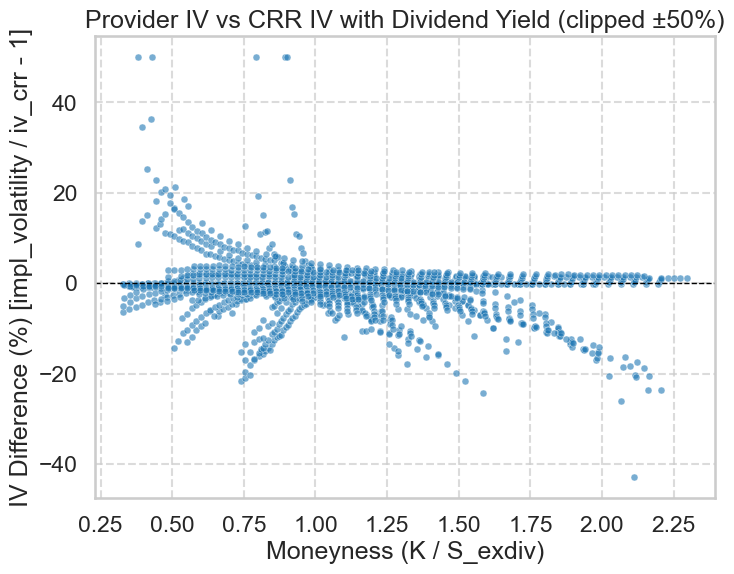

In [44]:
# Compute CRR IVs
options = options.copy()
options["iv_crr"] = rows_iv_crr(options)

# Compare to provider IV safely
valid = options[["strike","stock_exdiv","impl_volatility","iv_crr"]].dropna().copy()
valid["moneyness"] = valid["strike"] / valid["stock_exdiv"]
valid["iv_diff_pct"] = 100 * (valid["impl_volatility"] / valid["iv_crr"] - 1)

print(valid["iv_diff_pct"].describe())

# Scatter (optionally clip extreme y to visualize better)
import seaborn as sns, matplotlib.pyplot as plt
plot_df = valid.copy()
plot_df["iv_diff_pct_clip"] = plot_df["iv_diff_pct"].clip(lower=-50, upper=50)  # ±50% window

plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df, x="moneyness", y="iv_diff_pct_clip", alpha=0.6, s=25)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Moneyness (K / S_exdiv)")
plt.ylabel("IV Difference (%) [impl_volatility / iv_crr - 1]")
plt.title("Provider IV vs CRR IV with Dividend Yield (clipped ±50%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


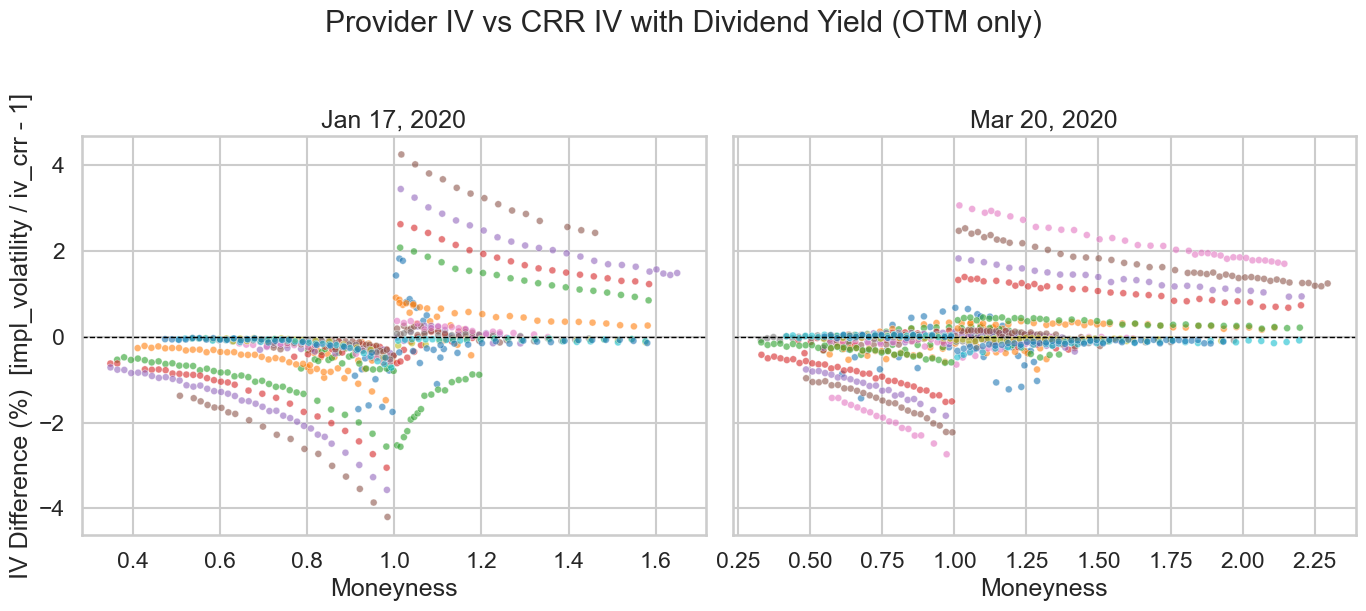

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prep: compute moneyness and % diff (clip extremes for readability)
df = options.copy()
df["moneyness"]   = df["strike"] / df["stock_exdiv"]
df["iv_diff_pct"] = 100 * (df["impl_volatility"] / df["iv_crr"] - 1)
df = df.dropna(subset=["moneyness", "iv_diff_pct", "date", "exdate"])

# (Optional) keep only OTM, to match previous questions
df = df[((df["cp_flag"]=="P") & (df["moneyness"]<=1.0)) |
        ((df["cp_flag"]=="C") & (df["moneyness"]>1.0))]

# Normalize dates so comparisons work
for c in ["date", "exdate"]:
    df[c] = pd.to_datetime(df[c]).dt.tz_localize(None).dt.normalize()

# Split by quote date
df_jan17 = df[df["date"] == pd.Timestamp("2020-01-17")].copy()
df_mar20 = df[df["date"] == pd.Timestamp("2020-03-20")].copy()

# Clip y for clearer y-scale (adjust if you want)
df_jan17["iv_diff_pct_clip"] = df_jan17["iv_diff_pct"].clip(-50, 50)
df_mar20["iv_diff_pct_clip"] = df_mar20["iv_diff_pct"].clip(-50, 50)

# ---- Plot: two panels, hue = expiration ----
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=df_jan17, x="moneyness", y="iv_diff_pct_clip",
    hue="exdate", palette="tab10", alpha=0.6, s=25, ax=axes[0]
)
axes[0].axhline(0, color="black", linestyle="--", linewidth=1)
axes[0].set_title("Jan 17, 2020")
axes[0].set_xlabel("Moneyness")
axes[0].set_ylabel("IV Difference (%)  [impl_volatility / iv_crr - 1]")

sns.scatterplot(
    data=df_mar20, x="moneyness", y="iv_diff_pct_clip",
    hue="exdate", palette="tab10", alpha=0.6, s=25, ax=axes[1]
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Mar 20, 2020")
axes[1].set_xlabel("Moneyness")
axes[1].set_ylabel("")

axes[0].legend_.remove()
axes[1].legend_.remove()

# One shared legend for expirations
#handles, labels = axes[1].get_legend_handles_labels()
#fig.legend(handles, labels, title="Expiration", loc="upper center", ncol=3)

fig.suptitle("Provider IV vs CRR IV with Dividend Yield (OTM only)", y=1.03)
plt.tight_layout()
plt.show()


# Question 6

Given that the CRR tree should converge to the BMS model, the implied volatility obtained from American options prices using the CRR model can be used in the BMS closed-form formulas to obtain the price at which otherwise identical European options should be traded. Use the approximate convenience yield obtained in the previous question and the 'implied_vol_bms' field provided with the data to do so. 

Plot the resulting value of early exercise options. (Hint: Because we are using an approximate convenience yield, some of these values could make little economic sense. Use your economic intuition to impose an upper bound on the artifical European prices.) Discuss the observed patterns.

In [54]:
def add_div_yield(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    S  = df["stock_price"].astype(float)
    Sx = df["stock_exdiv"].astype(float)
    T  = df["YTM"].astype(float)

    # continuous dividend/convenience yield y = (1/T) * ln(S / S_exdiv)
    y = np.where((T > 0) & (Sx > 0), np.log(S / Sx) / T, 0.0)

    # optional: avoid tiny negatives from noise
    y = np.maximum(y, 0.0)

    df["div_yield"] = y
    return df

# Use before compute_euro_equivalent(...)
options = add_div_yield(options)

# now this won't raise KeyError
options = compute_euro_equivalent(options)

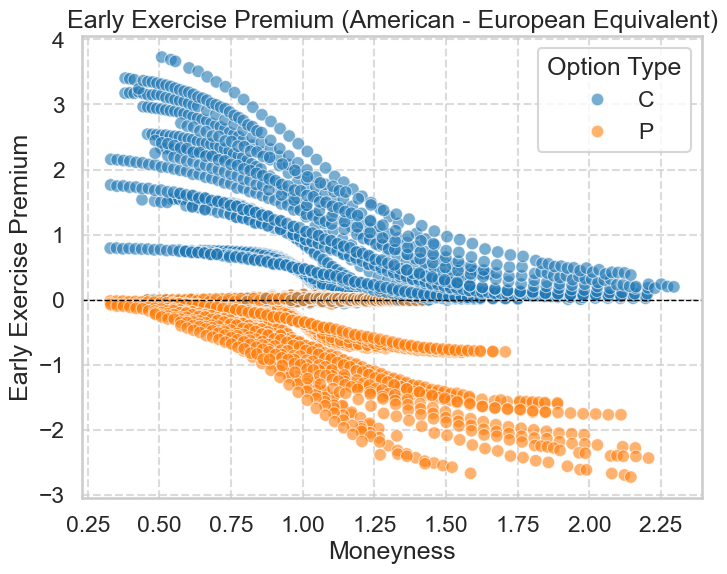

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# --- Black-Scholes price with continuous dividend yield ---
def bsm_price(S, K, T, r, y, sigma, cp_flag):
    """European option price with dividend yield y"""
    if T <= 0 or sigma <= 0:
        return np.nan
    
    d1 = (np.log(S / K) + (r - y + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if cp_flag == "C":
        return S * np.exp(-y * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # Put
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-y * T) * norm.cdf(-d1)

# --- Compute approximate European equivalent price ---
def compute_euro_equivalent(df):
    euro_prices = []
    
    for _, row in df.iterrows():
        S = row["stock_exdiv"]
        K = row["strike"]
        T = row["YTM"]
        r = row["risk_free"]
        y = row["div_yield"]      # from your previous step
        sigma = row["iv_crr"]     # CRR implied vol
        cp = row["cp_flag"]
        
        price_euro = bsm_price(S, K, T, r, y, sigma, cp)
        euro_prices.append(price_euro)
    
    df["euro_equiv"] = euro_prices
    return df

# --- Early exercise premium ---
# market price (American) - European price
options = compute_euro_equivalent(options)
options["early_ex_premium"] = options["option_price"] - options["euro_equiv"]

# --- Clip outliers for readability ---
options["early_ex_premium"] = options["early_ex_premium"].clip(lower=-5, upper=20)

# --- Plot ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=options,
    x="moneyness",
    y="early_ex_premium",
    hue="cp_flag",  # separate calls/puts
    alpha=0.6
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Moneyness")
plt.ylabel("Early Exercise Premium")
plt.title("Early Exercise Premium (American - European Equivalent)")
plt.legend(title="Option Type")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# Question 7

Muravyev, Pearson and Pollet (2022), suggest that we can use put-call parity to infer borrow fees on stocks. Let $h_t$ be the borrow fee at time $t$. An investor who buy the stock at $S_t$ can lend the stock and receive $h_tS_t$ at time $t+1$.

We can estimate the implied borrow fee from the option prices under Q measure: $h_{t}^{\mathbb{Q}}$. The put-call parity relation including one-day borrow fee is
\begin{equation*}
\hat{S}_t - S_t \left(1 - (1 - e^{-r(T-t)} h_{t}^{\mathbb{Q}})^D \right) = c_t - p_t + e^{-r(T-t)}K
\end{equation*}
where $D$ is the number of days to maturity. Consequently, the one-day borrow fee is:
\begin{equation*}
h_{t}^{\mathbb{Q}} = e^{r(T-t)} \left[1 - \left(1 - \frac{1}{S_t} (\hat{S}_t - c_t + p_t - e^{-r(T-t)} K) \right)^{1/D} \right]
\end{equation*}

Unfortunately, whereas put-call parity applies only to European options, options on individual equities are typically American. However, Muravyev, Pearson and Pollet (2025) suggest that, using a CRR implied volatility for American options, one can use the difference in 1-month ATM implied volatility of puts and calls in to compute an approximation to the above, which is
\begin{equation*}
h_t^{\mathbb{Q}} \approx -(\sigma_c - \sigma_p) / \sqrt{2\pi (T-t)}.
\end{equation*}
Compute this approximation on both dates in the sample and discuss your results.

In [59]:
import numpy as np
import pandas as pd

def compute_borrow_fee_approx(df, target_days=30, iv_col="iv_crr"):
    """
    Compute h_t^Q ≈ -(sigma_c - sigma_p) / sqrt(2π T)
    using ~1M ATM (K/Ŝ ≈ 1) vols per quote date.

    df needs columns: date, exdate, cp_flag ('C'/'P'), strike, stock_exdiv, YTM, DTM, and iv_col.
    """
    d = df.copy()

    # normalize dates and compute moneyness
    for c in ["date", "exdate"]:
        d[c] = pd.to_datetime(d[c]).dt.tz_localize(None).dt.normalize()
    d["M"] = d["strike"] / d["stock_exdiv"]

    # keep rows that have everything we need
    need = ["date", "exdate", "cp_flag", "M", "YTM", "DTM", iv_col]
    d = d.dropna(subset=need)

    out_rows = []
    for qdate in [pd.Timestamp("2020-01-17"), pd.Timestamp("2020-03-20")]:
        dq = d[d["date"] == qdate]
        if dq.empty:
            continue

        # expiry closest to target_days (use iloc for position!)
        pos_exp = (dq["DTM"].astype(float).sub(target_days).abs().values).argmin()
        ex_chosen = dq["exdate"].iloc[pos_exp]
        dqe = dq[dq["exdate"] == ex_chosen]

        # ATM call
        cands_c = dqe[dqe["cp_flag"].str.upper().str.startswith("C")]
        cands_p = dqe[dqe["cp_flag"].str.upper().str.startswith("P")]
        if cands_c.empty or cands_p.empty:
            continue

        pos_c = (cands_c["M"].sub(1.0).abs().values).argmin()
        pos_p = (cands_p["M"].sub(1.0).abs().values).argmin()
        sigma_c = float(cands_c[iv_col].iloc[pos_c])
        sigma_p = float(cands_p[iv_col].iloc[pos_p])

        # use the ATM contract's T (years); fallback to median if needed
        T_c = float(cands_c["YTM"].iloc[pos_c])
        T_p = float(cands_p["YTM"].iloc[pos_p])
        T = float(np.nanmean([T_c, T_p])) if np.isfinite(T_c) and np.isfinite(T_p) else float(dqe["YTM"].median())

        # borrow-fee approximation (continuous time)
        h_approx = -(sigma_c - sigma_p) / np.sqrt(2.0 * np.pi * max(T, 1e-12))

        out_rows.append({
            "quote_date": qdate.date(),
            "expiry": ex_chosen.date(),
            "sigma_c": sigma_c,
            "sigma_p": sigma_p,
            "T_years": T,
            "h_approx": h_approx
        })

    return pd.DataFrame(out_rows)


In [61]:
def plot_borrow_fee(bf_df):
    """
    Plot borrow fee approximation results.
    Expects DataFrame with columns: quote_date, expiry, h_approx.
    """
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=bf_df,
        x="quote_date",
        y="h_approx",
        hue="expiry",
        palette="tab10"
    )
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.ylabel("Borrow Fee Approximation h_t^Q")
    plt.xlabel("Quote Date")
    plt.title("Borrow Fee Approximation by Quote Date and Expiry")
    plt.legend(title="Expiry")
    plt.tight_layout()
    plt.show()

In [63]:
bf = compute_borrow_fee_approx(options, target_days=30, iv_col="iv_crr")  # or "impl_volatility"
print(bf)
#plot_borrow_fee(bf)

   quote_date      expiry   sigma_c   sigma_p   T_years  h_approx
0  2020-01-17  2020-02-14  0.295079  0.294105  0.076712 -0.001402
1  2020-03-20  2020-04-17  0.788747  0.773476  0.076712 -0.021995
